In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel ('gas-turbine.xlsx')
X = np.array(df[[
't_in_comp','t_housing_comp','t_housing2_turb','t_housing4_turb','t_out_turb','gas_fuel_flow','gas_fuel_pres','liq_fuel_flow','liq_fuel_pres']])
y = np.array(df[['real_power','app_power','react_power']])

## Ejercicio 1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = MLPRegressor(max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
display(pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]], index = ["Train", "Test"], columns = ["MSE", "R2"]))
print("20% Test, hiperparámetros por defecto")

,MSE,R2
Train,306928.786987,0.644382
Test,685912.355827,0.723070


20% Test, hiperparámetros por defecto


## Ejercicio 2

In [12]:
resultado = []
for i in range(20):
    clf = MLPRegressor(max_iter=1000, random_state=i)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    resultado.append([i, mse_train, mse_test])
resultado = np.array(resultado)

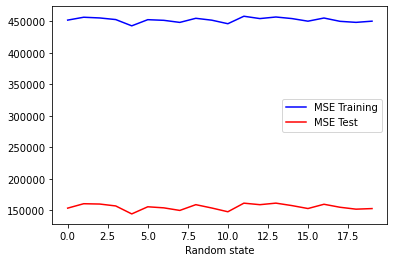

In [13]:
plt.plot(resultado[:,0], resultado[:,1], color='blue')
plt.plot(resultado[:,0], resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

## Ejercicio 3

In [15]:
resultado = []
for i in range(7):
    capas = [50]*i
    clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=capas, random_state=0)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    res = [i, mse_train, mse_test]
    resultado.append(res)
    display([i, mse_train, mse_test, capas])
resultado = np.array(resultado)

[0, 520851.432958791, 223861.30822988506, []]

[1, 456585.5617418885, 161974.6280367479, [50]]

[2, 440553.078417822, 140780.62542471243, [50, 50]]

[3, 441023.1376495136, 140409.91387292303, [50, 50, 50]]

[4, 437637.5844939851, 138445.29881975192, [50, 50, 50, 50]]

[5, 454487.95623740903, 153367.26194067902, [50, 50, 50, 50, 50]]

[6, 435169.2644440208, 136755.25679409728, [50, 50, 50, 50, 50, 50]]

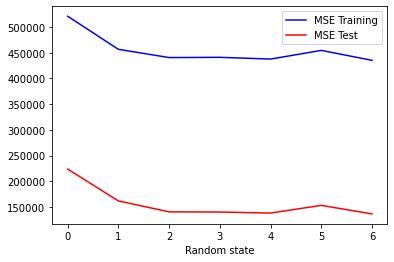

In [16]:
plt.plot(resultado[:,0], resultado[:,1], color='blue')
plt.plot(resultado[:,0], resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()